In [1]:
from IPython.display import Audio, display
import matplotlib.pyplot as plt
import numpy as np
import sampling
from utils import display_waveform, save_as_ani
import librosa
import torch
import soundfile

api_ = {"model_dir": "/Users/roywang/Schools/Project/DDPM_for_Audio/weights"}

model, device = sampling.setup(api_)
sample_rate = model.params.sample_rate

In [2]:

'''
audio = sampling.sample(model, device, multi_pass=1)
audio = audio.squeeze(0).detach().cpu()
display(Audio(audio,rate=sample_rate))
'''

'\naudio = sampling.sample(model, device, multi_pass=1)\naudio = audio.squeeze(0).detach().cpu()\ndisplay(Audio(audio,rate=sample_rate))\n'

In [3]:

new_wav = sampling.infer(model, sampling.interpolation_extention, "/Users/roywang/Schools/Project/DDPM_for_Audio/base_2.wav", device)
new_wav = new_wav.squeeze(0).detach().cpu()
print(new_wav.shape)
#300k steps model
soundfile.write("audios/interpolation_extend_5_sec.wav", new_wav, sample_rate)


Extending 1 second(s)


100%|██████████| 200/200 [00:40<00:00,  4.96it/s, lambda: 1.0]                  


Extending 2 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.18it/s, lambda: 1.0]                  


Extending 3 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.19it/s, lambda: 1.0]                  


Extending 4 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.19it/s, lambda: 1.0]                  


Extending 5 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.18it/s, lambda: 1.0]                  


torch.Size([330750])


In [4]:

new_wav_2 = sampling.infer(model, sampling.normal_ext, "/Users/roywang/Schools/Project/DDPM_for_Audio/base_2.wav", device)
new_wav_2 = new_wav_2.squeeze(0).detach().cpu()
print(new_wav_2.shape)
#300k steps model
soundfile.write("audios/resampling_extend_5_sec.wav", new_wav_2, sample_rate)


Extending 1 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.16it/s]


Extending 2 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.17it/s]


Extending 3 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.25it/s]


Extending 4 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.20it/s]


Extending 5 second(s)


100%|██████████| 200/200 [00:38<00:00,  5.21it/s]


torch.Size([330750])


In [5]:
new_wav_3 = sampling.infer(model, sampling.resampling_extension, "/Users/roywang/Schools/Project/DDPM_for_Audio/base_2.wav", device)
new_wav_3 = new_wav_3.squeeze(0).detach().cpu()
print(new_wav_3.shape)
#300k steps model
soundfile.write("audios/resampling_extend_5_sec.wav", new_wav_3, sample_rate)

Extending 1 second(s)
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


100%|██████████| 200/200 [06:24<00:00,  1.92s/it, n: 1, diffusion step: 0]    


Extending 2 second(s)
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


100%|██████████| 200/200 [06:24<00:00,  1.92s/it, n: 1, diffusion step: 0]    


Extending 3 second(s)
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


100%|██████████| 200/200 [06:23<00:00,  1.92s/it, n: 1, diffusion step: 0]    


Extending 4 second(s)
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


100%|██████████| 200/200 [06:24<00:00,  1.92s/it, n: 1, diffusion step: 0]    


Extending 5 second(s)
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


100%|██████████| 200/200 [06:23<00:00,  1.92s/it, n: 1, diffusion step: 0]    

torch.Size([330750])


In [6]:
#display_waveform_raw(signal=new_wav,text='interpolation', sample_rate=sample_rate)
#display_waveform_raw(signal=new_wav_2,text='resampling', sample_rate=sample_rate)

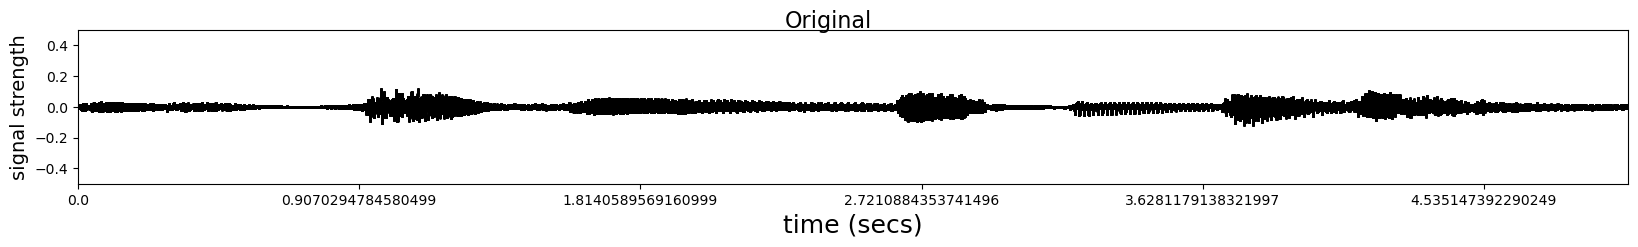

In [7]:
reference, _ = librosa.load("/Users/roywang/Schools/Project/DDPM_for_Audio/base_2.wav")
display_waveform(reference,text='Original', sample_rate=sample_rate)
display(Audio(reference,rate=sample_rate))
reference = torch.tensor(reference.astype(np.float32)).unsqueeze(0).to('mps')

100%|██████████| 200/200 [00:38<00:00,  5.17it/s, lambda: 1.0]                  


torch.Size([110250])


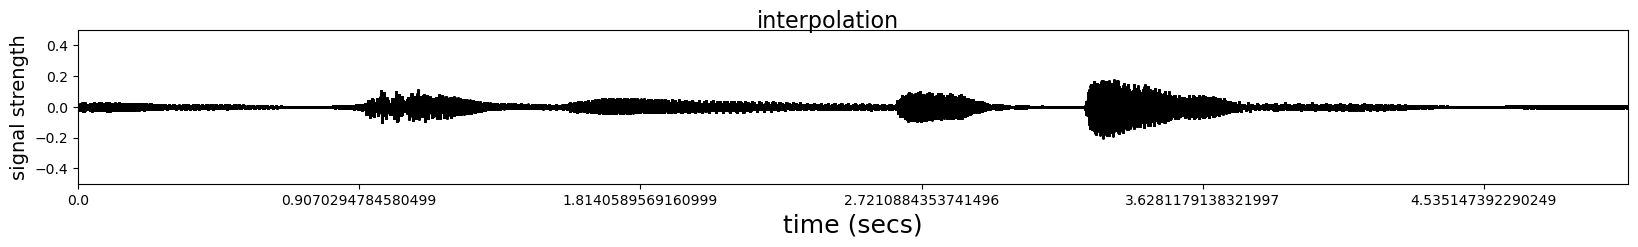

In [8]:

new_wav = sampling.interpolation_extention(model, reference[:, :88200], device)
new_wav = new_wav.squeeze(0).detach().cpu()
print(new_wav.shape)
#300k steps model
#save_as_ani(tgt_th_time, 'interpolation')
display_waveform(new_wav,text='interpolation', sample_rate=sample_rate)
display(Audio(new_wav,rate=sample_rate))


100%|██████████| 200/200 [00:38<00:00,  5.25it/s]


torch.Size([110250])


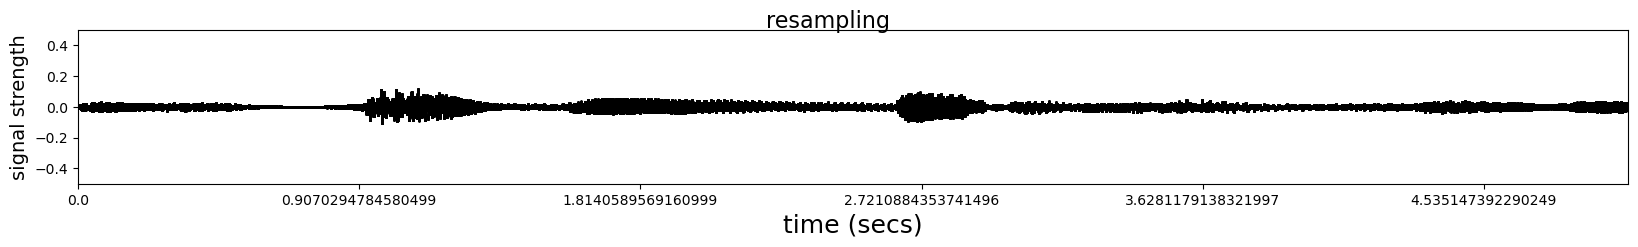

In [9]:
new_wav_2 = sampling.normal_ext(model, reference[:, :88200], device)
new_wav_2 = new_wav_2.squeeze(0).detach().cpu()
print(new_wav_2.shape)
#300k steps model
#save_as_ani(tgt_th_time, 'normal_concat')
display_waveform(new_wav_2,text='resampling', sample_rate=sample_rate)
display(Audio(new_wav_2,rate=sample_rate))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


100%|██████████| 200/200 [06:24<00:00,  1.92s/it, n: 1, diffusion step: 0]    


torch.Size([110250])


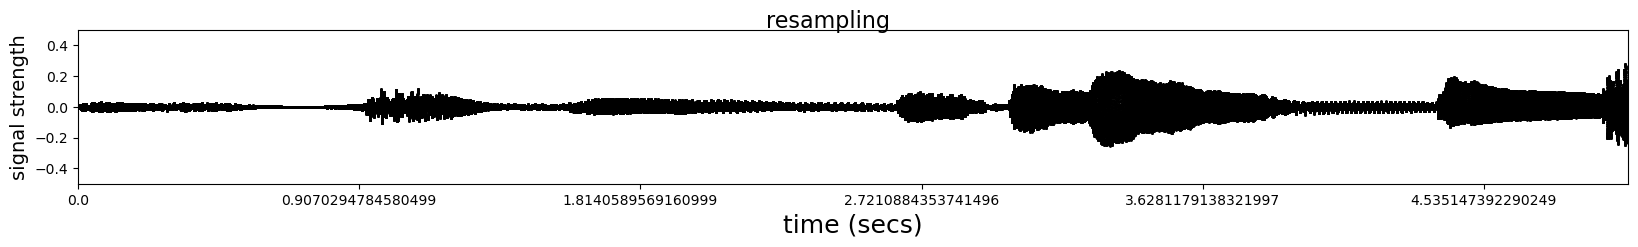

In [10]:
new_wav_3 = sampling.resampling_extension(model, reference[:, :88200], device)
new_wav_3 = new_wav_3.squeeze(0).detach().cpu()
print(new_wav_3.shape)
#300k steps model
display_waveform(new_wav_3,text='resampling', sample_rate=sample_rate)
display(Audio(new_wav_3,rate=sample_rate))